In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [21]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "f1", "grad", "finished"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data['crossover'] = data['crossover'].str.replace("NotModalSixPoint", "TwoPoint")

data.drop(['errorLimit'], axis=1, inplace=True)

data.head()

,crossover,nPop,error,time_minutes,1,2,3,4,5,6
0,ModalSixPoint,100,16.645259,63.732336,138.607226,794.896651,1182.343959,1323.928268,2159.219397,3271.478538
1,TwoPoint,100,18.726529,64.801415,132.730051,787.576270,1165.502961,1238.880622,2150.659751,3362.661102
2,ModalSixPoint,100,16.403133,63.636425,141.211509,772.848603,1203.792061,1404.333382,2080.010802,3258.651501
3,TwoPoint,100,18.377634,64.341165,134.781085,804.628116,1148.020360,1218.402764,2190.419016,3335.881912
4,ModalSixPoint,100,17.454602,63.665281,138.103266,784.298539,1178.955106,1287.026402,2110.966393,3250.239320


[]

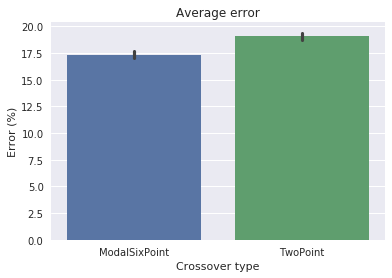

In [22]:
sns.barplot(x="crossover", y="error", data=data)
plt.title("Average error")
plt.xlabel("Crossover type")
plt.ylabel("Error (%)")
plt.plot()

#### Two-sided t-test

In [63]:
from scipy.stats import ttest_ind
(stat, pv) = ttest_ind(data.loc[data.crossover == "ModalSixPoint"].error, data.loc[data.crossover == "TwoPoint"].error, equal_var=False)
print("p-value = {:.4}".format(pv))

p-value = 3.872e-08


### Natural frequencies

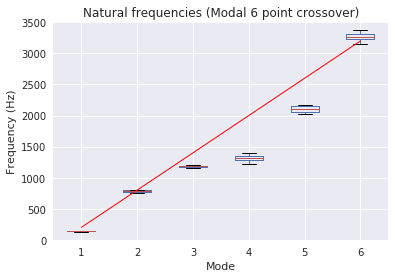

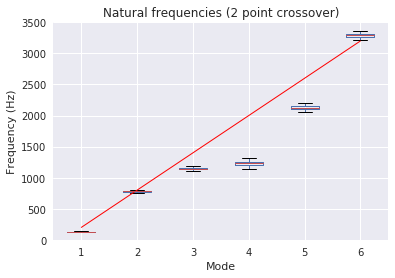

In [51]:
freq = data.drop(['error', 'time_minutes', 'nPop'], axis=1)

freq.loc[freq.crossover == "ModalSixPoint"].boxplot()
plt.title("Natural frequencies (Modal 6 point crossover)")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.ylim([0, 3500])
plt.plot([1, 6], [200, 3200], color='r', linestyle='-', linewidth=1)
plt.show()

freq = data.drop(['error', 'time_minutes', 'nPop'], axis=1)
freq[freq.crossover == "TwoPoint"].boxplot()
plt.title("Natural frequencies (2 point crossover)")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.ylim([0, 3500])
plt.plot([1, 6], [200, 3200], color='r', linestyle='-', linewidth=1)
plt.show()